# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [2]:
def drop(cond):
    car_dekho.drop(cond.index, inplace=True)

# Reading the data and getting insights

In [3]:
car_dekho = pd.read_csv('car_details_car_dekho.csv')

In [4]:
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
car_dekho.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Renaming selling_price column and converting it's values to USD

In [7]:
car_dekho.rename(columns={'selling_price':'price'}, inplace = True)

In [8]:
car_dekho['price'] = (car_dekho['price'] / 84).astype('int64')

In [9]:
car_dekho.isna().sum()

name            0
year            0
price           0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [10]:
car_dekho['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [11]:
car_dekho['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [12]:
car_dekho['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [13]:
car_dekho['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

Text(0, 0.5, 'price')

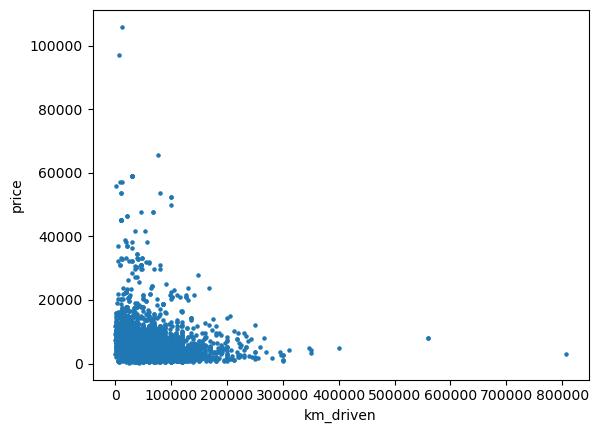

In [14]:
plt.scatter(car_dekho['km_driven'],car_dekho['price'],s=5)
plt.xlabel('km_driven')
plt.ylabel('price') 

# Average distance travelled by cars per year

In [15]:
car_dekho.groupby('year')['km_driven'].mean()

year
1992    100000.000000
1995    100000.000000
1996     47500.000000
1997     90000.000000
1998     64583.333333
1999     67702.000000
2000     70936.916667
2001     83712.850000
2002     85047.619048
2003     81671.347826
2004     90273.309524
2005     80991.517647
2006    102603.881818
2007     89308.679104
2008     89163.117241
2009     92521.284974
2010     91735.435897
2011     88096.287823
2012     83393.554217
2013     72728.422280
2014     75685.272480
2015     60585.206651
2016     55205.904762
2017     40485.763948
2018     27233.784153
2019     20912.476923
2020     11037.166667
Name: km_driven, dtype: float64

In [16]:
#can drop these as well as 400000 is well above the average amount driven for a car
km_ge_400000 = car_dekho[car_dekho['km_driven']>400000]
km_ge_400000

,name,year,price,km_driven,fuel,seller_type,transmission,owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,7916,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti Swift VXI BSIII,2009,2976,806599,Petrol,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,7916,560000,Diesel,Dealer,Manual,First Owner


In [17]:
drop(km_ge_400000)

In [18]:
#Since average is atleast 11000, we can drop cars having with less than 1000 km driven
km_driven_less_than_1000 = car_dekho[car_dekho['km_driven']<1000] 
km_driven_less_than_1000

,name,year,price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,2976,1,Diesel,Individual,Manual,Second Owner
1714,Ford Freestyle Titanium Diesel,2020,9333,101,Diesel,Dealer,Manual,Test Drive Car
1715,Ford Figo Titanium,2020,7559,101,Petrol,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,11904,101,Diesel,Dealer,Manual,Test Drive Car


In [19]:
drop(km_driven_less_than_1000)

In [20]:
#can drop
electric_car = car_dekho[car_dekho['fuel'] == 'Electric']
electric_car

,name,year,price,km_driven,fuel,seller_type,transmission,owner
4145,Toyota Camry Hybrid,2006,3690,62000,Electric,Dealer,Automatic,Second Owner


In [21]:
drop(electric_car)

In [22]:
#outliers can drop them 
price_above_80000 = car_dekho[car_dekho['price']>80000]
price_above_80000

,name,year,price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,97023,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,105952,13000,Petrol,Dealer,Automatic,First Owner


In [23]:
drop(price_above_80000)

In [24]:
car_dekho['year'].value_counts()

year
2017    465
2015    421
2012    415
2013    386
2014    366
2018    366
2016    354
2011    271
2010    234
2019    195
2009    192
2008    145
2007    134
2006    109
2005     85
2020     45
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

<Axes: xlabel='year'>

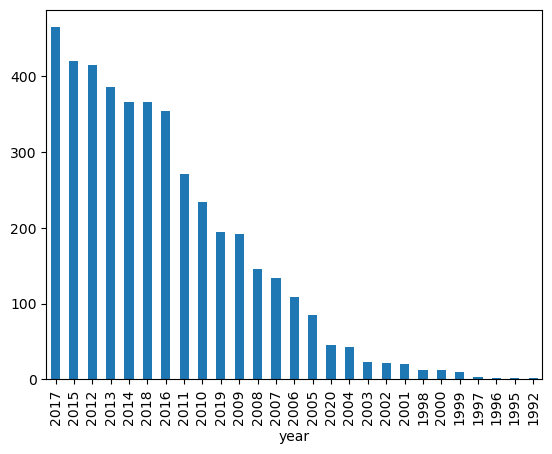

In [25]:
car_dekho['year'].value_counts().plot(kind = 'bar')

In [26]:
car_dekho.to_csv('car_dekho.csv', index=False)